In [2]:
from data_tools import *

In [3]:
img_dir='/home/jovyan/Planet/planet_flat'

In [4]:
tif_fns=fn_list(img_dir,"*_Analytic.tif")

/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/2575093_1060719_2019-08-04_1039_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/2548533_1060719_2019-07-25_0f15_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/2574618_1060618_2019-08-04_0f3d_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/703947_1060718_2017-08-22_1035_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/2574848_1060718_2019-08-04_0f4e_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/794418_1060719_2017-09-28_0f35_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/2548338_1060718_2019-07-25_1049_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/703648_1060719_2017-08-22_1014_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/647037_1060619_2017-07-25_103b_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/703527_1060618_2017-08-22_0c45_BGRN_Analytic.tif
/home/jovyan/Planet/planet_flat/2631559_1060618_2019-08-27_1032_BGRN_Analytic.tif
/home/jovyan/Planet/pl

In [30]:
#tif_fns[0]='/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic.tif'
#t='/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic_refl.tif'

In [31]:
#import numpy as np

#img=np.load('/home/jovyan/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy')
#img.shape

#blue=img[:,:,0]
#green=img[:,:,1]
#red=img[:,:,2]
#nir=img[:,:,3]

In [44]:
# Full image array
blue_full=np.ma.masked_equal(read_raster(tif_fns[2],band=1)[0],0)
green_full=np.ma.masked_equal(read_raster(tif_fns[2],band=2)[0],0)
red_full=np.ma.masked_equal(read_raster(tif_fns[2],band=3)[0],0)
nir_full=np.ma.masked_equal(read_raster(tif_fns[2],band=4)[0],0)

In [45]:
print(blue_full)

[[-- -- -- ... 919 891 877]
 [-- -- -- ... 930 893 883]
 [-- -- -- ... 931 887 889]
 ...
 [741 747 751 ... -- -- --]
 [745 748 747 ... -- -- --]
 [737 741 737 ... -- -- --]]


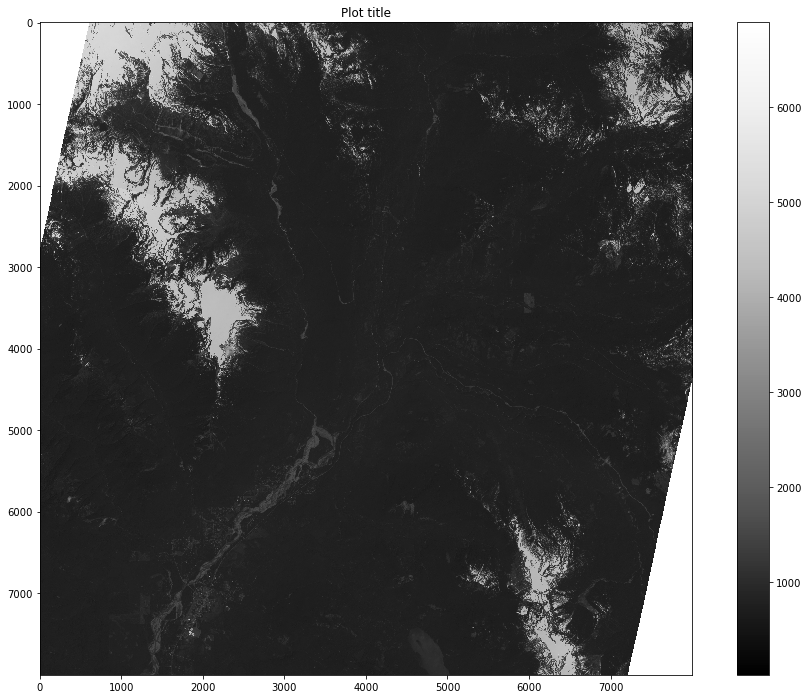

In [46]:
plot_me(blue_full)

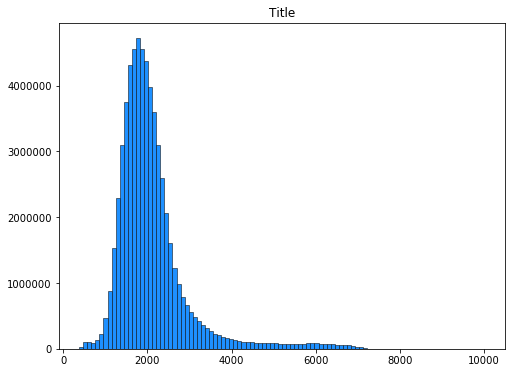

In [47]:
histo_me(np.ma.masked_equal(nir_full,0))

In [36]:
# subset 64x64
#subset=first[:64, :64]

In [37]:
#plot_me(subset)

In [5]:
blue=read_raster(tif_fns[0],band=1)[0][:64,:64]
green=read_raster(tif_fns[0],band=2)[0][:64,:64]
red=read_raster(tif_fns[0],band=3)[0][:64,:64]
nir=read_raster(tif_fns[0],band=4)[0][:64,:64]


In [49]:
rgb_img=np.dstack((red, green, blue))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


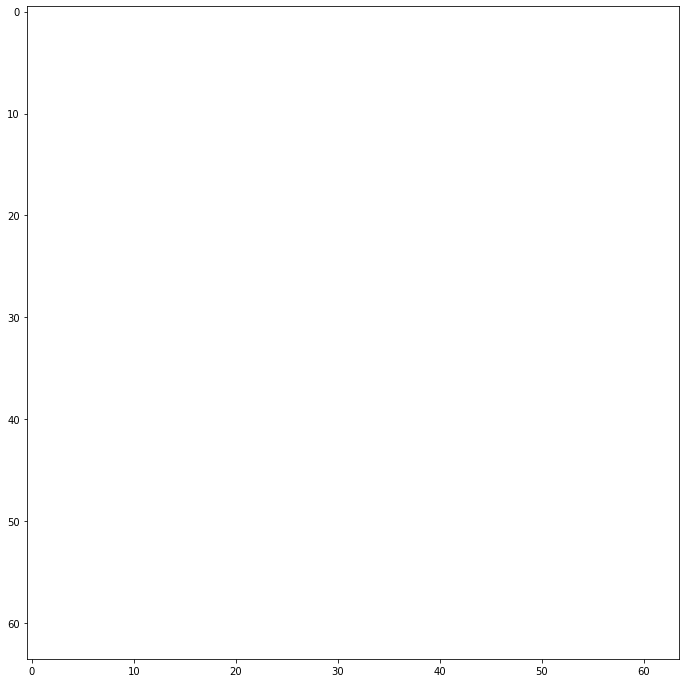

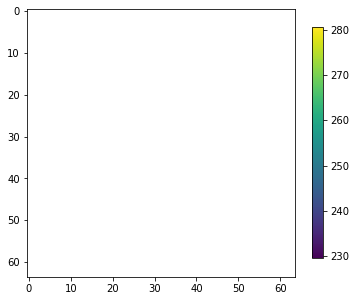

In [50]:
fig, ax = plt.subplots(1, figsize=(12,12))
plt.imshow(rgb_img)
#plot_me(nir)
window = rasterio.windows.Window(1024, 1024, 1280, 2560)

plt.figure(figsize=(6,8.5))
plt.imshow(rgb_img)
plt.colorbar(shrink=0.5)

In [6]:
#red[red == red.nodata] = np.nan  # Convert NoData to NaN
#nir[nir == nir.nodata] = np.nan  # Convert NoData to NaN
red_nir=red/nir
ndvi=(nir-red)/(nir+red)

#n
#def calc_ndvi(nir,red):
#    '''Calculate NDVI from integer arrays'''
#    nir = nir.astype('f4')
#    red = red.astype('f4')
#    ndvi = (nir - red) / (nir + red)
#    return ndvi
#ndvi = calc_ndvi(nir,red)
#plt.imshow(ndvi, cmap='RdYlGn')


In [7]:
n=tell_me_more(ndvi)
n1=tell_me_more(red/nir)

n1

[0.3942223059110545,
 0.4102410451778541,
 0.47048871161478256,
 0.5663945899646824,
 0.8870110475049319,
 0.9260114031008293,
 0.09949316247070142]

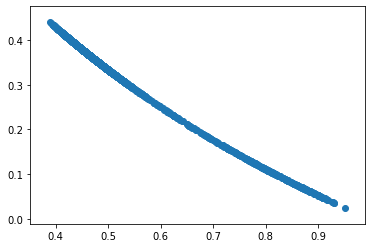

In [8]:
plt.scatter(red_nir, ndvi)

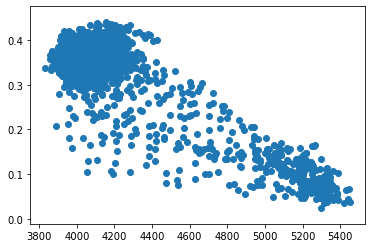

In [9]:
plt.scatter(blue, ndvi)

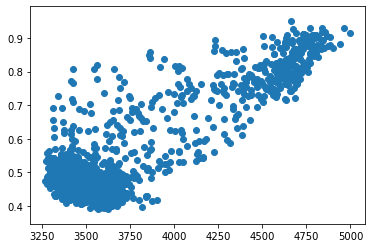

In [10]:
plt.scatter(green, red_nir)